# <font color='green'>Lecture 5.01 Discrete Random Variables</font>

<div class="alert alert-block alert-warning">
<b>
University of Tehran<br>
Spring 2024<br>
Course: Performance Evaluation of Computer Systems<br>
Instructor: Dr. Ahmad Khonsari<br>
</div>


***

# <span style="color:purple">Importing Required Packages</span>

In [ ]:
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import geom
from scipy.stats import nbinom
from scipy.stats import poisson

import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np


<font size="4">
Synopsis of transforms
    
In problems where random variables are nonnegative, it is usually more convenient to use the $z$-transform or the Laplace transform. The probability generating function $G_N(z)$ of a nonnegative integer-valued random variable $N$ is defined by
$$
\begin{aligned}
G_N(z) & =E\left[z^N\right] \\
& =\sum_{k=0}^{\infty} p_N(k) z^k .
\end{aligned}
$$
The first expression is the expected value of the function of $N, z^N$. The second expression is the $z$-transform of the pmf (with a sign change in the exponent).
In queueing theory one deals with service times, waiting times, and delays. All of these are nonnegative continuous random variables. It is therefore customary to work with the Laplace transform of the pdf,
$$
X *(s)=\int_0^{\infty} f_X(x) e^{-s x} d x=E\left[e^{-s X}\right]
$$
Note that $X^*(s)$ can be interpreted as a Laplace transform of the pdf or as an expected value of a function of $X, e^{-s X}$.

# <span style="color:purple" size="16">Discrete Random Variables</span>

<b><span style="color:orange">Calculating the moments</span> of the distribution with the aid of $G(z)=\sum^{\infty}_{i=0}p_iz^i$</b> <br />
<span>Note: Since the <b>$p_i$</b> represent a probability distribution their sum equals 1 and</span> <br />
\begin{equation*}
G(1) = G^{(0)}(1) \sum^{\infty}_{i=0}p_i1^i = 1
\end{equation*}
<span>By derivation one sees</span>
\begin{equation*}
G^{(1)}(z) = \frac{d}{dz}E[z^x] = E[Xz^{X-1}]
\end{equation*}

\begin{equation*}
G^{(1)}(1) = E[X]
\end{equation*}
<span>By continuing in the same way one gets</span>
\begin{equation*}
\boxed{G^{(i)}(z) = E[X(X-1)\dots(X-i+1)] = F_i}
\end{equation*}
<span>where $F_i$ is the $i^{th}$ <span style="color:orange">factorial moment.</span></span>
***

<span style="text-decoration:underline">The relation between factorial moments and ordinary moments (with respect to the origin)</span> <br />
<span>The <span style="color:orange">factorial moments</span> $F_i = E[X(X −1) ···(X −i + 1)]$ and <span style="color:orange">ordinary moments</span> (with resect to the origin) $M_i = E[X^i]$ are related by the linear equations:</span>
\begin{align*}
F_1 &= M_1 & M_1 &= F_1\\
F_2 &= M_2 - M_1 & M_2 &= F_2 + F_1\\
F_3 &= M_3 - 3M_2 + 2M_1 & M_3 &= F_3 + 3F_2 + F_1
\end{align*}
<span>For instance,</span>
\begin{equation*}
\begin{split}
F_2 &= G^{(2)}(1) = E[X(X-1)] = E[X^2] - E[X] \\
&\Rightarrow M_2 = E[X^2] = F_2 + F_1 = G^{(2)}(1) + G^{(1)}(1) \\
&\Rightarrow V[X] = M_2 - M^2_1 = G^{(2)}(1) + G^{(1)}(1) - (G^{(1)}(1))^2 = G^{(1)}(1)(1 - G^{(1)}(1))
\end{split}
\end{equation*}
***

<span style="text-decoration:underline">Direct calculation of the moments</span><br />
<span>The moments can also be derived from the generating function directly, without recourse to the factorial moments, as follows:</span><br />
\begin{equation*}
\begin{split}
\frac{d}{dz}G(z)\Bigg|_{z=1} = E[XZ^X]_{Z=1} = E[X] \\
\frac{d}{dz}z\frac{d}{dz}G(z)\Bigg|_{z=1} = E[X^2Z^X]_{Z=1} = E[X^2]
\end{split}
\end{equation*}
<span>Generally,</span>
\begin{equation*}
E[X^i] = \frac{d}{dz}\left(z\frac{d}{dz}\right)^{i-1}G(z)\Bigg|_{z=1} = \left(z\frac{d}{dz}\right)^i G(z)\Bigg|_{z=1}
\end{equation*}
***

<b>Generating function of the sum of independent random variables</b><br />
<span>Let <b>X</b> and <b>Y</b> be independent random variables. Then</span>
\begin{equation*}
\begin{split}
G_{X+Y}(Z) &= E[Z^{X+Y}] = E[Z^XZ^Y] \\
&= E[Z^X]E[Z^Y] \qquad independece  \\
&= G_X(Z)G_Y(Z)
\end{split}
\end{equation*}

\begin{equation*}
\boxed{G_{X+Y}(Z) = G_X(Z)G_Y(Z)}
\end{equation*}
<span>In terms of the original discrete distributions</span>
\begin{align*}
p_i &= P\{X=i\} \\
q_i &= P\{Y=j\}
\end{align*}
<span>the distribution of the sum is obtained by convolution $p \odot q$ </span>
\begin{equation*}
P\{X+Y=k\} = (p \odot q)_k = \sum^k_{i=0}p_iq_{k-1}
\end{equation*}
<span>Thus, the generating function of a distribution obtained by convolving two distributions is the product of the generating functions of the respective original distributions.</span>
\begin{align*}
\\
\end{align*}
<span>Question : What is the distribution of the difference of 2 independent RVs ?</span>
***

## Random Sum of iid RVs (Compound Distribution)

Let \( $S_{N}$ \) be the sum of independent, identically distributed (i.i.d.) random variables \( X_i \), with common mean and variance.

\[ $S_N = X_1 + X_2 + \cdots + X_N$ \]

where \( N \) is a non-negative integer-valued random variable also independent from all \( $X_i$ \).

What is \( $E[S_N]$ \), \( Var$[S_N]$ \) and the distribution of \( $S_N$ \)?

### Expectation \( $E[S_N]$ \):

For fixed \( n \)

$E[S_N | N=n] = E[ X_1 + X_2 + \cdots + X_N | N = n] = E[X_1 + X_2 + \cdots + X_n ] = nE[X_i]$





<b>Compound distribution and its expectation</b><br/>
<span>Let $Y$ be the sum of independent, identically distributed (i.i.d.) random
variables $X_i$, <br />
$Y = X_1 + X_2 + \dots X_N$ where N is a non-negative integer-valued random
variable. We wish to calculate $E[Y]$</span>
\begin{align*}
E[Y] &= E[E[Y|N]] \\
&= E[NE[XX]] \\
&= E[N]E[X]
\end{align*}
<b><span style="text-decoration:underline">Reminder: conditional expectation</span></b><br />
\begin{equation*}
E[Y|X = x] = \int^\infty_{-\infty} yf_{Y|X}(y|x)dy \qquad E[Y] = \sum_{\forall y}yp_{Y|X}(y|x)
\end{equation*}

\begin{align*}
E[Y] = E[E[Y|X=x]] &= \int^\infty_{-\infty}E[Y|X=x]f_X(x)dx \\
&= \int^\infty_{-\infty}\int^\infty_{-\infty}yf_{Y|X}(y|x)dyf_X(x)dx \\
&= \int^\infty_{-\infty} y \int^\infty_{-\infty} f_{X,Y}(x,y)dxdy = \int^\infty_{-\infty}yf_Y(y)dy
\end{align*}
***

Random SUM of iid RVS (Compound distribution) : Variance $\operatorname{var}\left[S_N\right]$
- for fixed $\mathrm{n}, \operatorname{var}\left[S_N \mid N=n\right]$ can be expressed as
$$
\begin{aligned}
& \operatorname{var}\left(S_N \mid N=n\right) \\
& =\operatorname{var}\left(X_1+X_2+\cdots+X_N \mid N=n\right) \\
& =\operatorname{var}\left(X_1+X_2+\cdots+X_n \mid N=n\right) \\
& =\operatorname{var}\left(X_1+X_2+\cdots+X_n\right) \\
& =n \operatorname{var}(X)
\end{aligned}
$$
independence
- $\operatorname{var}\left[S_N \mid N\right]$ can be viewed as a function of random variable $\mathrm{N}$
- $\operatorname{var}\left[S_N \mid N\right]$ is a random variable
- The variance of $S_N$ can be calculated using the law of total variance
$$
\begin{aligned}
\operatorname{var}\left(S_N\right) & =\mathbf{E}\left[\operatorname{var}\left(S_N \mid N\right)\right]+\operatorname{var}\left(\mathbf{E}\left[S_N \mid N\right]\right) \\
& =\mathbf{E}[N \operatorname{var}(X)]+\operatorname{var}(N \mathbf{E}[\mathrm{X}]) \\
& =\operatorname{var}(X) \mathbf{E}[N]+(\mathbf{E}[X])^2 \operatorname{var}(N)
\end{aligned}
$$

<b>Compound distribution and its generating function</b><br />
<span>Let $𝑆_𝑁$ be the sum of independent, identically distributed (i.i.d.) random variables $X_i$,</span>
\begin{equation*}
S_N = X_1 + X_2 + \dots + X_N
\end{equation*}
<span>where $N$ is a non-negative integer-valued random variable. Denote $G_X(z)$ the common generating function of the $X_i$</span><br />
<span>$G_X(z)$ the generating function of the $N$</span>
\begin{align*}
E[Z^{𝑆_𝑁}|N = n] &= [𝐺_𝑋(𝑧)]^n \qquad n = 1, 2, 3, \dots \\
E[Z^{𝑆_𝑁}|N = n] &= E[Z^{X_1+X_2+\dots +X_N}|N=n] \\
&= E[Z^{X_1}Z^{X_2}\dots Z^{X_N}|N=n] \\ (independence)
&= E[Z^{X_1}]E[Z^{X_2}]\dots E[Z^{X_n}] = [G_X(Z)]^n
\end{align*}
***

<span>We wish to calculate $G_{S_N}(Z)$</span>
\begin{align*}
G_{S_N}(Z) &= E[Z^{S_N}] & \\
&= E[E[Z^{S_N}|N]] \qquad & &Law\ of\ iterated\ expectation \\
&= E[G_X(Z)^N] \qquad & &Using\ E[Z^{S_N}|N=n] = [G_X(Z)]^n \\
&= G_N (G_X(Z))
\end{align*}

\begin{equation*}
\boxed{G_{S_N}(Z) = G_N (G_X(Z))} \quad
\begin{aligned}
&Analogy \\
&G_Y(Z) = E[Z^Y] \leftrightarrow G_N(G_X(Z)) = E[G_X(Z)^N]
\end{aligned}
\end{equation*}
***

$$
\begin{aligned}
& :\text{for iid  xi:} \quad s=\sum_{i=1}^n x_i \quad, N \perp x_i\\
& E[S]=E[N] E[X] \\
& E\left[S^2\right]=E[N] \operatorname{var}(x)+E\left[N^2\right](E(x])^2 \\
& \operatorname{Var}(s)=E[N] \operatorname{Var}(x)+\operatorname{Var}(N)(E(x])^2 \\
&
\end{aligned}
$$
reminder:
$$
\begin{aligned}
& \operatorname{Var}(x \mid y=y)=E\left[(x-E[x \mid y=y])^2 \mid y=y\right] \\
& \operatorname{Var}(x)=E(\operatorname{var}(x \mid y))+\operatorname{var}(\underbrace{E(x \mid y))}_{\text {explained }}
\end{aligned}
$$

suppose that xi are iid and N is subset of xi and N is independet from xi and:
$$
S=\sum_{i=1}^{\sim} x_i \widehat{N \perp x}_i
$$
 then calculate :$ E\left(s^2\right), E(s)$
$$
\begin{aligned}
& E(s)=E\left[\sum_{i=1}^N X_i\right]=\sum_n E\left[\sum_{i=1}^N X_i \mid N=n\right] \cdot P(N=n) \quad n \in \operatorname{support} N \\
& =\sum_n E\left[\sum_{i=1}^n X_i\right] \cdot P(N=n): \\
& =\sum_n n E(x) \cdot p(N=n) \quad E\left[\sum x_i\right]=\sum E(x)=\text { Xi }_i \text { ciflid } \\
& F E(x) \sum n p(N e n) \\
& =E(X) E(N) \\
&
\end{aligned}
$$

*** آیا می توان شگرد فوق را برای محاسبه $E(S^2)$ بکار برد؟**

خیر چون محاسبه مجموع
\
$\left(\sum_{i=1} X_i\right)^2$
\
.مشکل است

$$
\begin{aligned}
E\left(S^2\right) & =\sum_n E\left(S^2 \mid N=n\right) p(N=n) \\
& =\sum_n E\left[\left(\sum_{i=1} X_i\right)^2\right] \cdot p(N=n)
\end{aligned}
$$

روش بهتر : محاسبه
\
 $E(S^2 | N=n)$ و از روی آن ${var}(s \mid N=n) $
\
\
$$
میدانیم
\
\operatorname{Var}(s \mid N=n)=n{Var}(x)
$$
$$ nVar(X) = Var(S|N=n) = E[S^2|N = n] - (E[S|N=n])^2 = E[S^2 | N=n] - (nE[x])^2$$
\
$$
E[s^2 | N=n] = nVar(x) + n^2[E(x)]^2
$$

$$
E[s^2] = \sum_n E[s^2|N=n] \cdot P(N=n)
$$
$$
= \sum_n (nVar(x)+n^2(E(x)^2))P(N=n)
$$
$$
=E[N]Var(x)+E[N^2](E[x])^2
\\
$$
$$
\\
$$
در ضمن برای $Var(s)$ هم بدست می آید
$$
\\
Var(s) = E[s^2] - (E[s])^2
\\
$$
$$
= E[N]Var(x) + 1/2(E[N^2] - E[N]^2)(E[x])^2
\\
$$
$$
= E[N]Var(x) + Var(N)[E[x]]^2
$$



<b>The distribution of max and min of independent RVs</b><br />
<span>Let $X_1, X_2, \dots, X_n$ be independent random variables (distribution functions $F_i(x)$ and tail distributions $G_i(x), i = 1, \dots , n)$</span><br />
<br />
<b>Distribution of the maximum</b><br />
\begin{align*}
P\{max(X_1, X_2, \dots, X_n) \leq x\} &= P\{X_1 leq x, \dots, X_n \leq x\} \\
&= P\{X_1 \leq x\} \dots P\{X_n \leq x\}\ (independence!) \\
&= F_1(x) \dots F_n(x)
\end{align*}
<br />
<b>Distribution of the minimum</b>
\begin{align*}
P\{min(X_1, X_2, \dots, X_n) > x\} &= P\{X_1 > x, \dots, X_n > x\} \\
&= P\{X_1 > x\} \dots P\{X_n > x\}\ (independence!) \\
&= G_1(x) \dots G_n(x)
\end{align*}
***

Theoretical Mean of S_N: 1.5
Theoretical Variance of S_N: 1.5
Sample Mean of S_N: 1.4851293031327935
Sample Variance of S_N: 1.4470468519224078


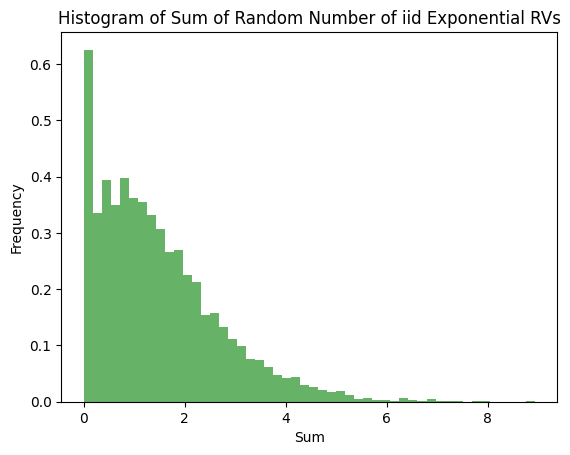

In [ ]:
import numpy as np

# Parameters for the distributions
lambda_N = 3  # Mean of the Poisson distribution for N
lambda_X = 2  # Rate of the Exponential distribution for X

# Generate a large number of samples for N (Poisson distributed)
N_samples = np.random.poisson(lambda_N, 10000)

# Generate a large number of samples for X (Exponential distributed)
X_samples = [np.random.exponential(1/lambda_X, size=n).sum() for n in N_samples]

# Calculate the theoretical mean and variance
E_N = lambda_N
Var_N = lambda_N
E_X = 1 / lambda_X
Var_X = 1 / (lambda_X ** 2)

mean_S_N = E_N * E_X
var_S_N = E_N * Var_X + Var_N * (E_X ** 2)

# Print the theoretical mean and variance
print(f"Theoretical Mean of S_N: {mean_S_N}")
print(f"Theoretical Variance of S_N: {var_S_N}")

# Calculate the sample mean and variance
sample_mean_S_N = np.mean(X_samples)
sample_var_S_N = np.var(X_samples)

# Print the sample mean and variance
print(f"Sample Mean of S_N: {sample_mean_S_N}")
print(f"Sample Variance of S_N: {sample_var_S_N}")

# Plot the histogram of the sum S_N
import matplotlib.pyplot as plt

plt.hist(X_samples, bins=50, density=True, alpha=0.6, color='g')
plt.title('Histogram of Sum of Random Number of iid Exponential RVs')
plt.xlabel('Sum')
plt.ylabel('Frequency')
plt.show()

# The distribution of max and min of independent RVs

Let $\mathbf{X}$ be a vector of $n$ iid random variables each with CDF $F_X(x)$ and PDF $f_X(x)$.

(a) The CDF and the PDF of $Y = \max\{X_1, \ldots, X_n\}$ are
$$
F_Y(y) = \left(F_X(y)\right)^n, \quad f_Y(y) = n \left(F_X(y)\right)^{n-1} f_X(y).
$$

(b) The CDF and the PDF of $W = \min\{X_1, \ldots, X_n\}$ are
$$
F_W(w) = 1 - \left(1 - F_X(w)\right)^n, \quad f_W(w) = n \left(1 - F_X(w)\right)^{n-1} f_X(w).
$$

**Proof** By definition, $f_Y(y) = P(Y \leq y)$. Because $Y$ is the maximum value of $\{X_1, \ldots, X_n\}$, the event $\{Y \leq y\} = \{X_1 \leq y, X_2 \leq y, \ldots, X_n \leq y\}$. Because all the random variables $X_i$ are iid, $\{Y \leq y\}$ is the intersection of $n$ independent events. Each of the events $\{X_i \leq y\}$ has probability $F_X(y)$. The probability of the intersection is the product of the individual probabilities, which implies the first part of the theorem: $F_Y(y) = (F_X(y))^n$. The second part is the result of differentiating $F_Y(y)$ with respect to $y$. The derivations of $F_W(w)$ and $f_W(w)$ are similar. They begin with the observations that $F_W(w) = 1 - P(W > w)$ and that the event $\{W > w\} = \{X_1 > w, X_2 > w, \ldots, X_n > w\}$, which is the intersection of $n$ independent events, each with probability $1 - F_X(w)$.

**ORDER STATISTICS**
Let $X_1, X_2, \dots, X_n$ be mutually i.i.d. continuous RVs, each having the distribution function $F$ and density $f$.

Let $Y_1, Y_2, \dots, Y_n$ be a permutation of the set $X_1, X_2, \dots, X_n$ so as to be in increasing order.

To be specific:
$Y_1 = \min\{X_1, X_2, \dots, X_n\}$
and
$Y_n = \max\{X_1, X_2, \dots, X_n\}$

$Y_k$ is called the **$k$th-order statistic**.

Since $X_1, X_2, \dots, X_n$ are continuous RVs, it follows that $Y_1 < Y_2 < \dots < Y_n$ (as opposed to $Y_1 \leq Y_2 \leq \dots \leq Y_n$) with a probability of one.


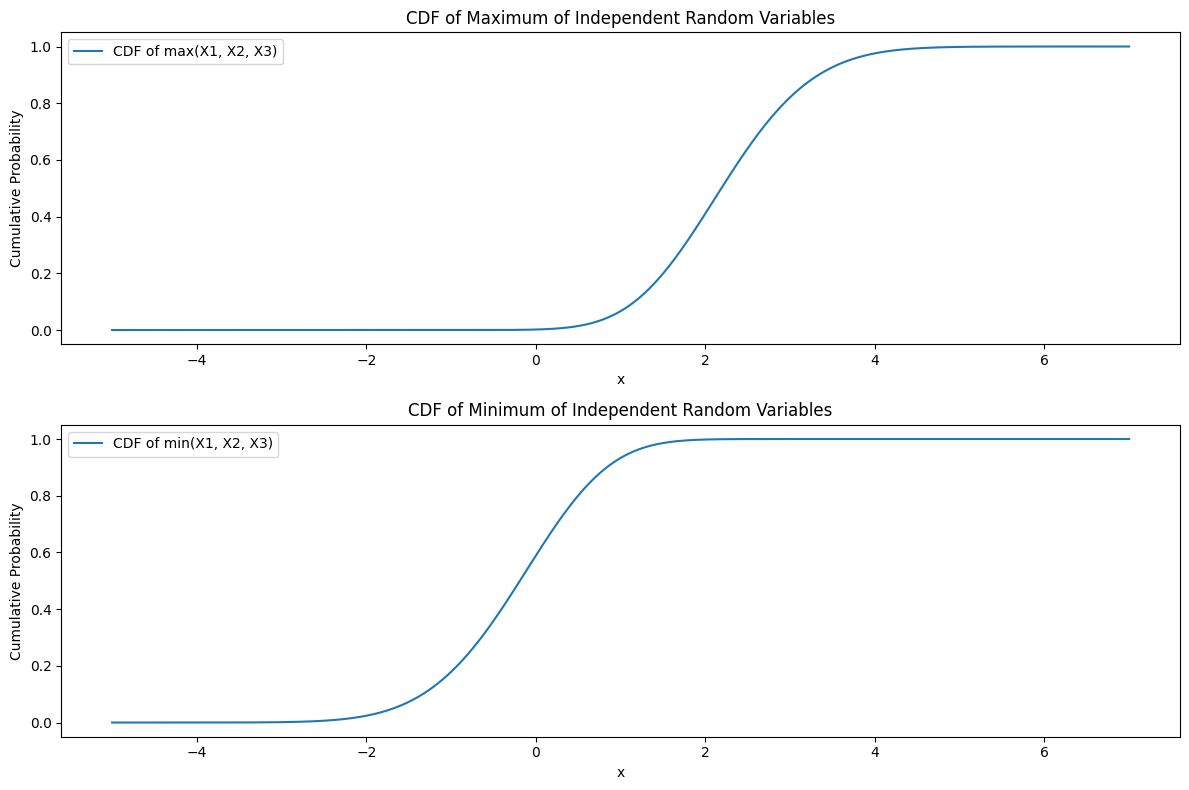

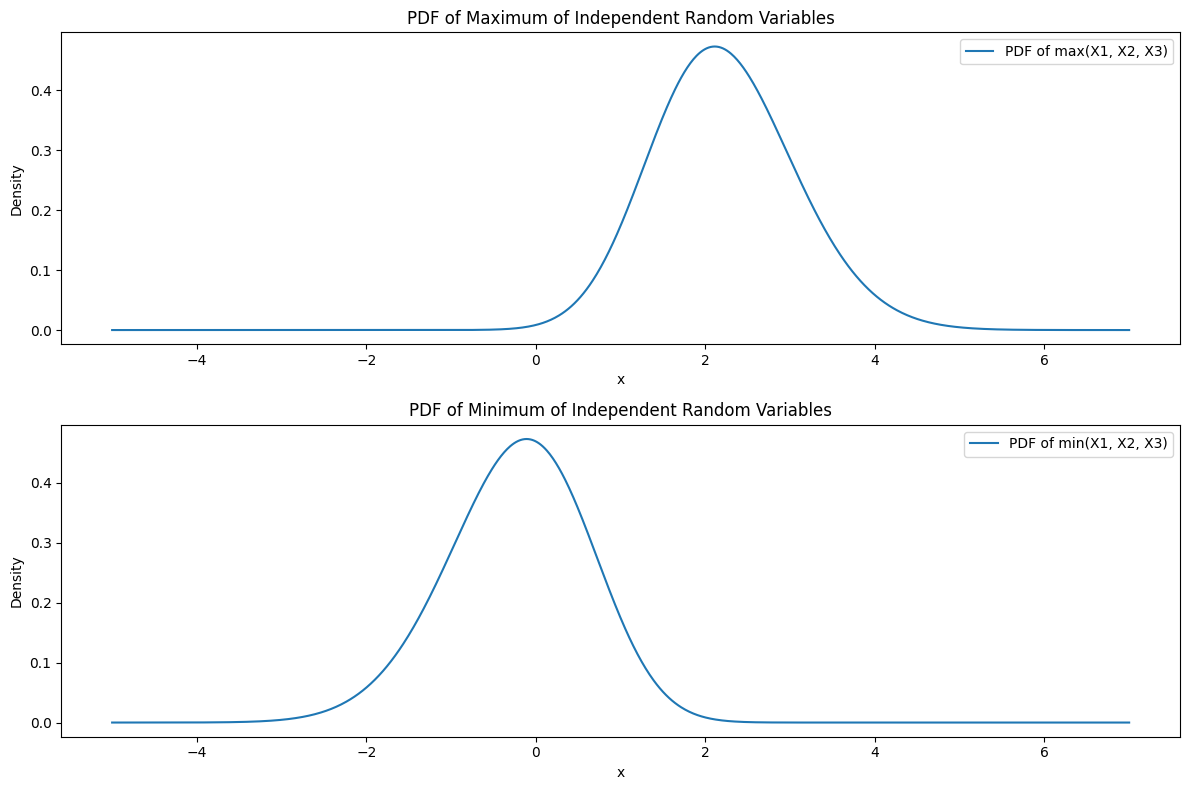

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the normal distributions
mu = [0, 1, 2]  # Means for the three distributions
sigma = [1, 1, 1]  # Standard deviations for the three distributions
n = len(mu)

# Define the range for x
x = np.linspace(-5, 7, 1000)

# Calculate the CDFs for each of the normal distributions
cdf_X = [norm.cdf(x, mu[i], sigma[i]) for i in range(n)]
tail_X = [1 - cdf_X[i] for i in range(n)]

# Calculate the CDF of the maximum
cdf_max = np.prod(cdf_X, axis=0)

# Calculate the CDF of the minimum
cdf_min = 1 - np.prod(tail_X, axis=0)

# Plot the CDFs of the maximum and minimum
plt.figure(figsize=(12, 8))

# Plot CDF of the maximum
plt.subplot(2, 1, 1)
plt.plot(x, cdf_max, label='CDF of max(X1, X2, X3)')
plt.title('CDF of Maximum of Independent Random Variables')
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.legend()

# Plot CDF of the minimum
plt.subplot(2, 1, 2)
plt.plot(x, cdf_min, label='CDF of min(X1, X2, X3)')
plt.title('CDF of Minimum of Independent Random Variables')
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate PDFs by differentiating the CDFs
pdf_max = np.gradient(cdf_max, x[1] - x[0])
pdf_min = np.gradient(cdf_min, x[1] - x[0])

# Plot the PDFs of the maximum and minimum
plt.figure(figsize=(12, 8))

# Plot PDF of the maximum
plt.subplot(2, 1, 1)
plt.plot(x, pdf_max, label='PDF of max(X1, X2, X3)')
plt.title('PDF of Maximum of Independent Random Variables')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()

# Plot PDF of the minimum
plt.subplot(2, 1, 2)
plt.plot(x, pdf_min, label='PDF of min(X1, X2, X3)')
plt.title('PDF of Minimum of Independent Random Variables')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

<b>ORDER STATISTICS</b><br />
<span>As examples of use of order statistics, let $X$; be the lifetime of the ith component in a system of n independent components.<br />
series system,<br />
$Y_1$  is overall system lifetime of a series system.<br />
    
Parallel systems
    
$Y_n$ is the lifetime of a parallel system<br />
and $Y_{n-k+1}$ is the lifetime of an m-out of-n system (the so-called Ntuple Modular Redundant or NMR system).</span>
***

### <b>ORDER STATISTICS</b><br />
<b>Deriving the distribution function of $Y_k$</b><br />
<span>the probability that exactly j of the $X_i$'s lie in $(-\infty, y]$ and $(n - j)$ lie in $(y, \infty)$ is:<br />
$\begin{pmatrix} n \\ j \end{pmatrix} F^j(y)[I-F(y)]^{n-j} $
since the binomial distribution with parameters $n$ and $p = F(y)$ is applicable.
</span><br /><br />
<span>Then:<br />
$F_{Y_k}(y) = p(y_k \leq y) = P("at\ least\ k\ of\ the\ X;'s\ lie\ in\ the\ interval\ (-\infty, y] ")$ <br/>
$=\sum^n_{j=k} \begin{pmatrix} n \\ j \end{pmatrix} F^j(y)[I - F(y)]^{n-j} \qquad -\infty \leq y \leq \infty$ (3.52)</span>
***

### <b>ORDER STATISTICS</b>
<span>In particular, the distribution functions of $Y_n$ and $Y_1$ (i.e. <b>max and min</b>) can be obtained from (3.52) as:</span><br />
# ORDER STATISTICS

In particular, the distribution functions of $Y_n$ and $Y_1$ (i.e. max and min) can be obtained from (3.52) as:

$$
F_{Y_n}(y) = \sum_{j=n}^n \binom{n}{j} F^j(y)[1 - F(y)]^{n-j} = [F(y)]^n \quad -\infty \le y \le \infty,
$$

$$
F_{Y_1}(y) = \sum_{j=1}^n \binom{n}{j} F^j(y)[1 - F(y)]^{n-j}
$$

$$
= \sum_{j=0}^n \binom{n}{j} F^j(y)[1 - F(y)]^{n-j} - \binom{n}{0} F^0(y)[1 - F(y)]^{n-0} = 1 - [1 - F(y)]^n \quad -\infty \le y \le \infty
$$

$$
\sum_{i=0}^n p_i = \sum_{i=0}^n \binom{n}{i} p^i (1-p)^{n-i} = [p + (1 - p)]^n = 1.
$$
\begin{align*}
&F_{Y_k}(y) = [F(y)]^n & -\infty \leq y \leq \infty, \\
&F_{Y_1}(y) = 1 - [1 - F(y)]^n & -\infty \leq y \leq \infty
\end{align*}
<span>Thus we obtain:</span>
\begin{align*}
&R_{series}(t) = Ry_1(t) = 1 - F_{Y_1}(t) = [1 - F(t)]^n = [R(t)]^n \\
&R_{parallel}(t) = Ry_1(t) = 1 - F_{Y_n}(t) = 1 - [F(t)]^n = 1 - [1 - R(t)]^n
\end{align*}
<span>We may generalize above to the case when the lifetime distributions of individual components are distinct:</span>
\begin{align*}
&R_{series}(t) = Ry_1(t) = \prod^n_{i=1} R_{i_{Y_1}}(t)
\end{align*}
***
$$R_{\text{parallel}}(t) = 1- \prod_{i=1}^{n} (1 - R_i(t))$$


### <span>Perf Eval of Comp Systems</span><br />
## <span style="color: blue">7. Important distributions</span><br />
<b>We will deal with:</b><br />
- discrete distributions:
    - Bernoulli;
    - binomial;
    - geometric;
    - Negative Binomial;
    - Poisson.
***


### <span>Perf Eval of Comp Systems</span><br />
#### <span style="color: blue">7.1 The Bernoulli(p)</span>
<span>$X \sim Bernoulli(p)$</span><br>
<b>Assume we have one experiment:</b><br>
<span>event $A$ occurs with probability p; $Pr[\{A\}] = p\ 0 \leq p \leq 1$</span><br>
<span>event $A$ does not occur with probability (1 - p); $Pr[\{\bar{A}\}]= 1 - p = q \quad 0 \leq p \leq 1 \qquad \Omega=\{A,\bar{A}\}$</span><br>
<span>If X is a r.v. drawn from the Bernoulli(p) distribution, write: X ∼ Bernoulli(p) and we define RV X as:</span>
\begin{equation*}
X =
\begin{cases}
1 & w/ prob\ p \\
0 & otherwise
\end{cases}
\end{equation*}
<span>The p.m.f. of r.v. X is defined as:</span>
\begin{align*}
P_X(1) &= p \\
P_X(0) &= 1 - p
\end{align*}




Enter p value: .8


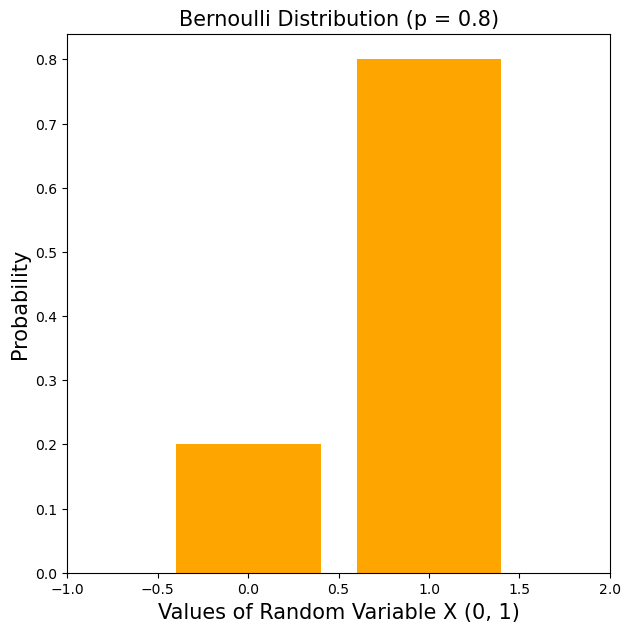

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

# Parameter initialization
p = float(input("Enter p value: "))
X = [0, 1]

# Plot configuration
plt.figure(figsize=(7, 7))
plt.xlim(-1, 2)
plt.bar(X, bernoulli.pmf(X, p), color='orange')
plt.title(f'Bernoulli Distribution (p = {p})', fontsize='15')
plt.xlabel('Values of Random Variable X (0, 1)', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.show()


### <b>Mean and Variance of a Bernoulli Random Variable</b><br>
<span>The <b>mean</b> is:</span>
\begin{equation*}
\mu_X = E(X) = \sum_XxP(x) = (0)(1 - P) + (1)P = P
\end{equation*}
<span>and the <b>variance</b> is:</span>
\begin{align*}
\sigma^2_X &= E[(X - \mu_X)^2] = \sum_X(x - \mu_X)^2P(x) \\
&= (0 - P)^2(1 - P) + (1 - P)^2P = P(1 - P)
\end{align*}
***

<span style="text-decoration:underline">Bernoulli distribution</span> <br>
<span><b>Example 1.</b>X describes the bit stream from a traffic source, which is either on or off. The generating function</span>
\begin{align*}
G(z) &= p_0z^0 + p_1z^1 = q + pz \\
E[X] &= G^{(1)}(1) = p \\
V[X] &= G^{(2)}(1) + G^{(1)}(1)(1 - G^{(1)}(1)) = p(1 - p) = pq
\end{align*}
<br>
<span><b>Example 2.</b>The cell stream arriving at an input port of an ATM switch:<br>
in a time slot (cell slot) there is a cell with probability p or the slot is empty with probability q.</span>
***



Theoretical Mean: 0.3
Sample Mean: 0.2984
Theoretical Variance: 0.21
Sample Variance: 0.2093574400000001


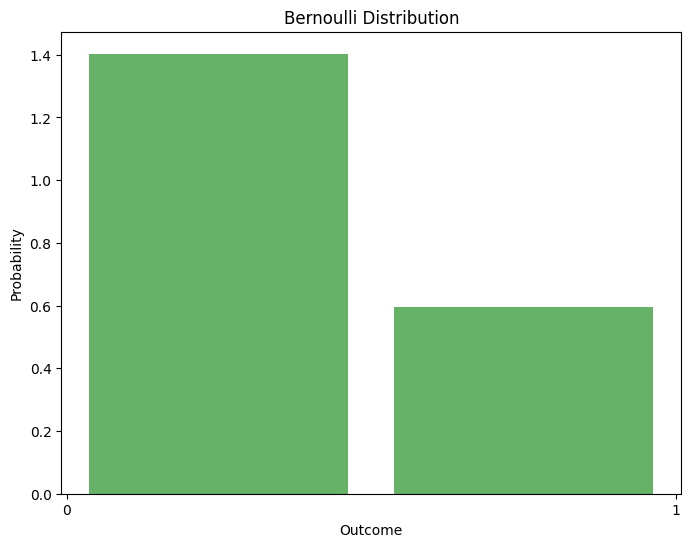

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the probability of success
p = 0.3

# Generate a large number of Bernoulli trials
n_trials = 10000
bernoulli_samples = np.random.binomial(1, p, n_trials)

# Calculate the sample mean and variance
sample_mean = np.mean(bernoulli_samples)
sample_variance = np.var(bernoulli_samples)

# Theoretical mean and variance
theoretical_mean = p
theoretical_variance = p * (1 - p)

# Print the results
print(f"Theoretical Mean: {theoretical_mean}")
print(f"Sample Mean: {sample_mean}")
print(f"Theoretical Variance: {theoretical_variance}")
print(f"Sample Variance: {sample_variance}")

# Plot the Bernoulli distribution
plt.figure(figsize=(8, 6))
plt.hist(bernoulli_samples, bins=2, density=True, alpha=0.6, color='g', rwidth=0.85)
plt.title('Bernoulli Distribution')
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.xticks([0, 1])
plt.show()

#### <span style="color: blue">7.2 Binomial (n, p) distribution</span>
<span>$X \sim Bin(n, p)$</span><br>
<b>Definition: </b>
<span>if $X \sim Binpmial(n, p)$, then X represents the number of successes in $n$ Bernoulli(p) experiments</span><br>
\begin{equation*}
X = \sum^n_{i=1}Y_i \quad where\ Y_i \sim Bernoulli(p)\ and\ the\ Y_i\ are\ independent\ (i = 1, \dots, n)
\end{equation*}
<span>The p.m.f. of r.v. X is defined as follows</span>
\begin{equation*}
Pr[X=i] = 𝐶^k_np^k(1 − 𝑝)^{n-k}\qquad k = 0,1,\dots,n,\ 0 \leq p\leq 1.
\end{equation*}

\begin{equation*}
C^k_n = \begin{pmatrix} n \\ k \end{pmatrix}
\end{equation*}
***

**Note:** prove that Binomial is a probability distribution

$$
\sum_{i=0}^n p_i = \sum_{i=0}^n \binom{n}{i} p^i (1-p)^{n-i} = [p + (1 - p)]^n = 1.
$$


Enter p value: .8
Enter n value: 10


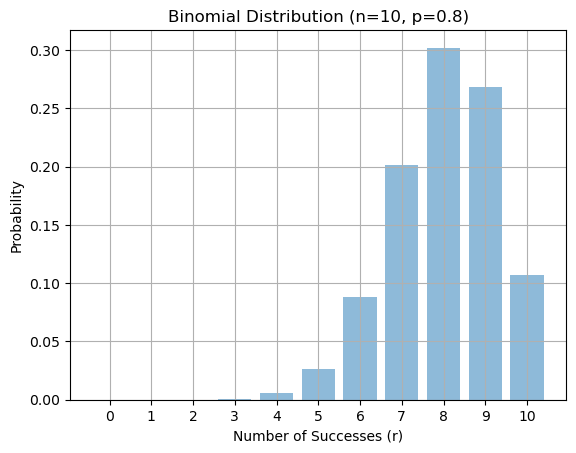

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameter initialization
p = float(input("Enter p value: "))
n = int(input("Enter n value: "))
r_values = list(range(n + 1))
dist = [binom.pmf(r, n, p) for r in r_values]

# Plot Configuration
plt.bar(r_values, dist, align='center', alpha=0.5)
plt.xticks(r_values)
plt.xlabel('Number of Successes (r)')
plt.ylabel('Probability')
plt.title(f"Binomial Distribution (n={n}, p={p})")
plt.grid(True)
plt.show()


<b><span style="text-decoration:underline">Binomial distribution</span></b>
<span>$X \sim Bin(n, p)$</span><br>
<span>The generating function is obtained directly from the generating function $q + pz$ of a Bernoulli variable</span>
$$
G(z) = \sum_{i=0}^\infty p_i z^i = \sum_{i=1}^n \binom{n}{i} p^i (1-p)^{n-i} z^i = \sum_{i=1}^n \binom{n}{i} (pz)^i (1 - p)^{n-i} = (q + pz)^n
$$
\begin{equation*}
G(Z) = (q + pz)^n = \sum^n_{i=1}p^i(1 - p)^{n-i}z^i
\end{equation*}
<span>By identifying the coefficient of $Z^i$ we have</span>
\begin{equation*}
\boxed{p_i = P\{X = i\} = \begin{pmatrix} n \\ i \end{pmatrix}p^i(1 - p)^{n-i}}
\end{equation*}

\begin{align*}
E[X] &= nE[Y_i] = np \\
V[X] &= nV[Y_i] = np(1 - p)
\end{align*}
<span>A limiting form when $\lambda = E[X] = np$ is fixed and $n \rightarrow \infty$:</span>
\begin{equation*}
G(z) = (1 - (1 - z)p)^n = \left(1 - (1 - z) \frac{\lambda}{n}\right)^n \rightarrow e^{(z - 1) \lambda}
\end{equation*}
<span>which is the generating function of a Poisson random variable.</span>
***

## Practical Example: Quality Control

Suppose you are a quality control inspector at a factory. The factory produces small electronic components, and the probability that a single component is defective is \( $p = 0.05 $\). You randomly select \( $n = 100 $\) components from the production line. You want to find the probability that exactly 5 components are defective, and also calculate the mean and variance of the number of defective components.

### Binomial Distribution

The Binomial distribution models the number of successes in a fixed number of independent Bernoulli trials. The probability mass function (PMF) is given by:

$$ P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k} $$

where:
- \( n \) is the number of trials,
- \( p \) is the probability of success (a defective component in this context),
- \( k \) is the number of successes (defective components).

### Mean and Variance

For a Binomial random variable \($X$\):
- The mean (expected value) is:
  \[ $E[X] = np$ \]
- The variance is:
  \[ $\text{Var}(X) = np(1 - p) $\]

Probability of exactly 5 defective components: 0.1800
Theoretical Mean: 5.0
Theoretical Variance: 4.75


<ipython-input-4-3f3c653069db>:28: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(x, pmf, use_line_collection=True)


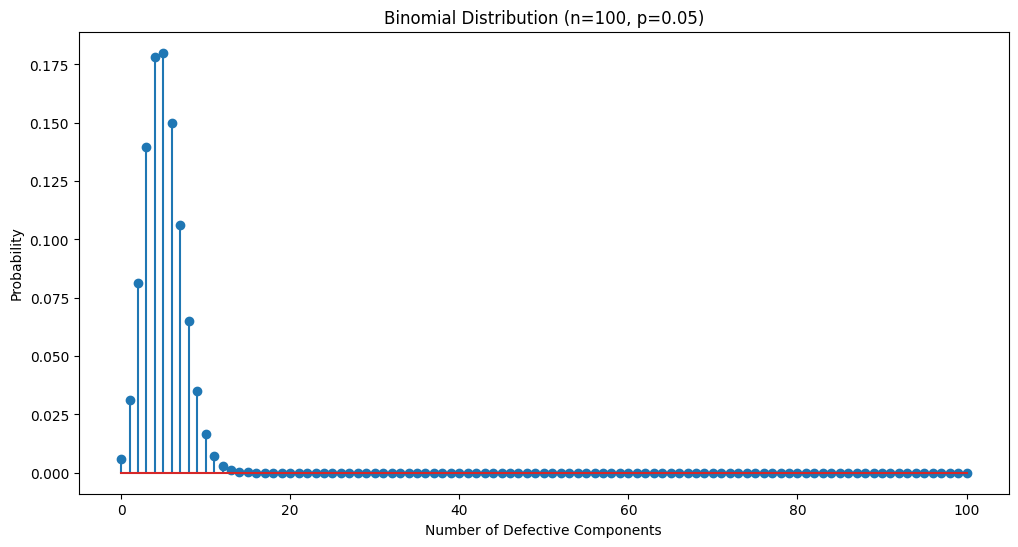

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters
n = 100  # Number of trials
p = 0.05  # Probability of success (defective component)

# Probability of exactly 5 defective components
k = 5
probability_k_defects = binom.pmf(k, n, p)

# Mean and variance
mean = n * p
variance = n * p * (1 - p)

# Print the results
print(f"Probability of exactly {k} defective components: {probability_k_defects:.4f}")
print(f"Theoretical Mean: {mean}")
print(f"Theoretical Variance: {variance}")

# Generate a range of possible number of defective components
x = np.arange(0, n+1)
pmf = binom.pmf(x, n, p)

# Plot the Binomial distribution
plt.figure(figsize=(12, 6))
plt.stem(x, pmf, use_line_collection=True)
plt.title('Binomial Distribution (n=100, p=0.05)')
plt.xlabel('Number of Defective Components')
plt.ylabel('Probability')
plt.show()



### Theorem 6.2

The variance of $W_n = X_1 + \cdots + X_n$ is
$$
\text{Var}[W_n] = \sum_{i=1}^n \text{Var}[X_i] + 2 \sum_{i=1}^{n-1} \sum_{j=i+1}^n \text{Cov}[X_i, X_j].
$$

**Proof** From the definition of the variance, we can write $\text{Var}[W_n] = \mathbb{E}[(W_n - \mathbb{E}[W_n])^2]$. For convenience, let $\mu_i$ denote $\mathbb{E}[X_i]$. Since $W_n = \sum_{i=1}^n X_n$ and $\mathbb{E}[W_n] = \sum_{i=1}^n \mu_i$, we can write
$$
\text{Var}[W_n] = \mathbb{E} \left[ \left( \sum_{i=1}^n (X_i - \mu_i) \right)^2 \right] = \mathbb{E} \left[ \sum_{i=1}^n (X_i - \mu_i) \sum_{j=1}^n (X_j - \mu_i) \right]
$$

$$
= \sum_{i=1}^n \sum_{j=1}^n \text{Cov}[X_i, X_j].
$$
(6.2)

$$
= \sum_{i=1}^n \sum_{j=1}^n \text{Cov}[X_i, X_j].
$$
(6.3)

In terms of the random vector $\mathbf{X} = [X_1, \ldots, X_n]'$, we see that $\text{Var}[W_n]$ is the sum of all the elements of the covariance matrix $\mathbf{C}_X$. Recognizing that $\text{Cov}[X_i, X_i] = \text{Var}[X]$ and $\text{Cov}[X_i, X_j] = \text{Cov}[X_j, X_i]$, we place the diagonal terms of $\mathbf{C}_X$ in one sum and the off-diagonal terms (which occur in pairs) in another sum to arrive at the formula in the theorem.

When $X_1, \ldots, X_n$ are uncorrelated, $\text{Cov}[X_i, X_j] = 0$ for $i \ne j$ and the variance of the sum is the sum of the variances:

### Theorem 6.3
When $X_1, \ldots, X_n$ are uncorrelated,
$$
\text{Var}[W_n] = \text{Var}[X_1] + \cdots + \text{Var}[X_n].
$$

<b><span style="text-decoration:underline">The sum of binomially distributed random variables</span></b><br>
<span>Let  the $X_i (i = 1, \dots, k)$ be binomially distributed with the same parameter $p$ (but with different $n_i$). Then the distribution of their sum is distributed as</span>
\begin{equation*}
X_1 + \dots + X_k \sim Bin(n_1 + \dots + n_k, p)
\end{equation*}
<span>because the sum represents the number of successes in a sequence of n1 + · · · + nk identical Bernoulli trials.</span>
***

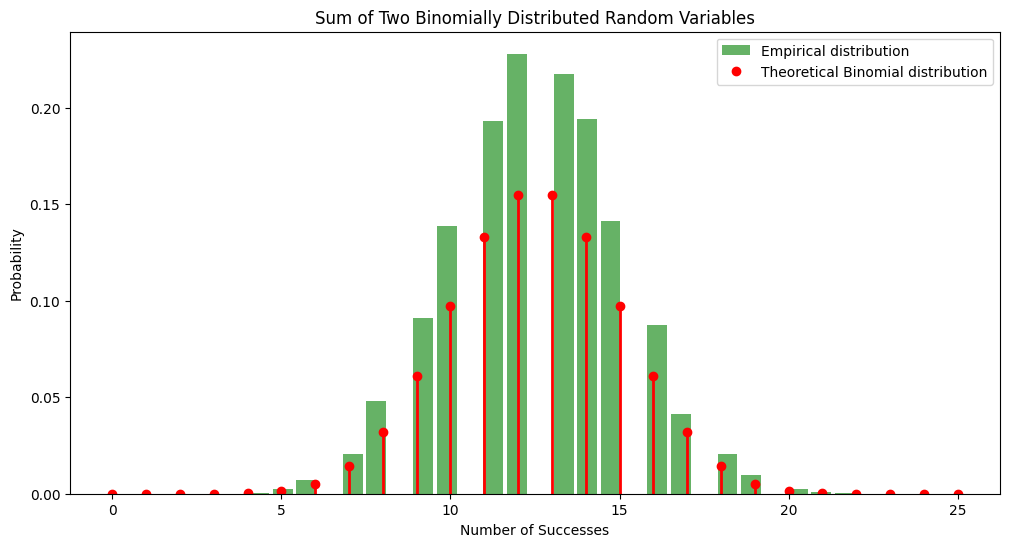

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters for the binomial distributions
n1, p1 = 10, 0.5  # First binomial distribution
n2, p2 = 15, 0.5  # Second binomial distribution

# Generate samples from the binomial distributions
size = 10000
samples_X1 = np.random.binomial(n1, p1, size)
samples_X2 = np.random.binomial(n2, p2, size)

# Sum the two binomially distributed random variables
samples_sum = samples_X1 + samples_X2

# Calculate the theoretical binomial distribution for the sum
n_sum = n1 + n2
p_sum = p1  # The probability parameter remains the same
x = np.arange(0, n_sum + 1)
pmf_sum = binom.pmf(x, n_sum, p_sum)

# Plot the histogram of the sum and the theoretical binomial distribution
plt.figure(figsize=(12, 6))

# Plot histogram of the sum
plt.hist(samples_sum, bins=n_sum+1, density=True, alpha=0.6, color='g', rwidth=0.85, label='Empirical distribution')

# Plot the theoretical binomial distribution
plt.plot(x, pmf_sum, 'ro', label='Theoretical Binomial distribution')
plt.vlines(x, 0, pmf_sum, colors='r', linestyles='-', lw=2)

plt.title('Sum of Two Binomially Distributed Random Variables')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.legend()
plt.show()

# Example 6.1

$X_0, X_1, X_2, \ldots$ is a sequence of random variables with expected values $\mathbb{E}[X_i] = 0$ and covariances, $\text{Cov}[X_i, X_j] = 0.8^{|i-j|}$. Find the expected value and variance of a random variable $Y_i$ defined as the sum of three consecutive values of the random sequence

$$
Y_i = X_i + X_{i-1} + X_{i-2}. \quad \text{(6.4)}
$$

Theorem 6.1 implies that

$$
\mathbb{E} [Y_i] = \mathbb{E} [X_i] + \mathbb{E} [X_{i-1}] + \mathbb{E} [X_{i-2}] = 0. \quad \text{(6.5)}
$$

Applying Theorem 6.2, we obtain for each $i$,

$$
\text{Var}[Y_i] = \text{Var}[X_i] + \text{Var}[X_{i-1}] + \text{Var}[X_{i-2}]
+ 2 \text{Cov} [X_i, X_{i-1}] + 2 \text{Cov} [X_i, X_{i-2}] + 2 \text{Cov} [X_{i-1}, X_{i-2}]. \quad \text{(6.6)}
$$

We next note that $\text{Var}[X_i] = \text{Cov}[X_i, X_i] = 0.8^{|i-i|} = 1$ and that

$$
\text{Cov} [X_i, X_{i-1}] = \text{Cov} [X_{i-1}, X_{i-2}] = 0.8^1, \quad \text{Cov} [X_i, X_{i-2}] = 0.8^2. \quad \text{(6.7)}
$$

Therefore

$$
\text{Var}[Y_i] = 3 \times 0.8^0 + 4 \times 0.8^1 + 2 \times 0.8^2 = 7.48. \quad \text{(6.8)}
$$

# Example 6.2

At a party of $n \ge 2$ people, each person throws a hat in a common box. The box is shaken and each person blindly draws a hat from the box without replacement. We say a match occurs if a person draws his own hat. What are the expected value and variance of $V_n$, the number of matches?

Let $X_i$ denote an indicator random variable such that

$$
X_i =
\begin{cases}
1 & \text{person } i \text{ draws his hat}, \\
0 & \text{otherwise}.
\end{cases} \quad \text{(6.9)}
$$

The number of matches is $V_n = X_1 + \cdots + X_n$. Note that the $X_i$ are generally not independent. For example, with $n = 2$ people, if the first person draws his own hat, then the second person must also draw her own hat. Note that the $i$th person is equally likely to draw any of the $n$ hats, thus $P_{X_i}(1) = 1/n$ and $\mathbb{E}[X_i] = P_{X_i}(1) = 1/n$. Since the expected value of the sum always equals the sum of the expected values,

$$
\mathbb{E} [V_n] = \mathbb{E} [X_1] + \cdots + \mathbb{E} [X_n] = n(1/n) = 1. \quad \text{(6.10)}
$$

To find the variance of $V_n$, we will use Theorem 6.2. The variance of $X_i$ is

$$
\text{Var}[X_i] = \mathbb{E} [X_i^2] - (\mathbb{E} [X_i])^2 = \frac{1}{n} - \frac{1}{n^2}. \quad \text{(6.11)}
$$

To find $\text{Cov}[X_i, X_j]$, we observe that

$$
\text{Cov}[X_i, X_j] = \mathbb{E} [X_i X_j] - \mathbb{E} [X_i] \mathbb{E} [X_j]. \quad \text{(6.12)}
$$

Note that $X_i X_j = 1$ if and only if $X_i = 1$ and $X_j = 1$, and that $X_i X_j = 0$ otherwise. Thus

$$
\mathbb{E} [X_i X_j] = P_{X_i X_j} (1,1) = P_{X_i|X_j}(1|1) P_{X_j} (1). \quad \text{(6.13)}
$$

Given $X_j = 1$, that is, the $j$th person drew his own hat, then $X_i = 1$ if and only if the $i$th person draws his own hat from the $n - 1$ other hats. Hence $P_{X_i | X_j} (1 | 1) = 1/(n-1)$ and

$$
\mathbb{E} [X_i X_j] = \frac{1}{n(n-1)}. \quad \text{(6.14)}
$$
$$
\mathbb{Cov} [X_i,X_j] = \frac{1}{n(n-1)} - \frac{1}{n^2}. \quad \text{(6.14)}
$$

Finally, we can use Theorem 6.2 to calculate

$$
\text{Var}[V_n] = n \text{Var}[X_i] + n(n - 1) \text{Cov} [X_i, X_j] = 1. \quad \text{(6.15)}
$$

That is, both the expected value and variance of $V_n$ are 1, no matter how large $n$ is!

# Example 6.3

Continuing Example 6.2, suppose each person immediately returns to the box the hat that he or she drew. What is the expected value and variance of $V_n$, the number of matches?

In this case the indicator random variables $X_i$ are iid because each person draws from the same bin containing all $n$ hats. The number of matches $V_n = X_1 + \cdots + X_n$ is the sum of $n$ iid random variables. As before, the expected value of $V_n$ is

$$
\mathbb{E} [V_n] = n \mathbb{E} [X_i] = 1. \quad \text{(6.16)}
$$

In this case, the variance of $V_n$ equals the sum of the variances,

$$
\text{Var}[V_n] = n \text{Var}[X_i] = n \left( \frac{1}{n} - \frac{1}{n^2} \right) = 1 - \frac{1}{n}. \quad \text{(6.17)}
$$

# Example 6.6: deterministic sum: distribution

$J$ and $K$ are independent random variables with probability mass functions

$$
P_J (j) =
\begin{cases}
0.2 & j = 1, \\
0.6 & j = 2, \\
0.2 & j = 3, \\
0 & \text{otherwise},
\end{cases} \quad P_K (k) =
\begin{cases}
0.5 & k = -1, \\
0.5 & k = 1, \\
0 & \text{otherwise}.
\end{cases} \quad \text{(6.40)}
$$

Find the MGF of $M = J + K$? What are $\mathbb{E} [M^3]$ and $P_M(m)$?

$J$ and $K$ have moment generating functions

$$
\phi_J (s) = 0.2 e^s + 0.6 e^{2s} + 0.2 e^{3s}, \quad \phi_K (s) = 0.5 e^{-s} + 0.5 e^s. \quad \text{(6.41)}
$$

Therefore, by Theorem 6.8, $M = J + K$ has MGF

$$
\phi_M (s) = \phi_J (s) \phi_K (s) = 0.1 + 0.3 e^s + 0.2 e^{2s} + 0.3 e^{3s} + 0.1 e^{4s}. \quad \text{(6.42)}
$$

To find the third moment of $M$, we differentiate $\phi_M (s)$ three times:


$$
E \left[ M^3 \right] = \left. \frac{d^3 \phi_M(s)}{ds^3} \right|_{s=0} \\
= 0.3e^s + 0.2(2^3)e^{2s} + 0.3(3^3)e^{3s} + 0.1(4^3)e^{4s} \\
= 16.4. \tag{6.44}
$$

The value of \( P_M(m) \) at any value of \( m \) is the coefficient of \( e^{ms} \) in \( \phi_M(s) \):

$$
\phi_M(s) = E \left[ e^{sM} \right] = 0.1 + 0.3e^s + 0.2e^{2s} + 0.3e^{3s} + 0.1e^{4s}. \tag{6.45}
$$

The complete expression for the PMF of \( M \) is

$$
P_M(m) = \begin{cases}
0.1 & m = 0, 4, \\
0.3 & m = 1, 3, \\
0.2 & m = 2, \\
0 & \text{otherwise}.
\end{cases} \tag{6.46}
$$

**Theorem 6.10**

The sum of \( n \) independent Gaussian random variables \( $W = X_1 + \cdots + X_n $\) is a Gaussian random variable.

Proof: For convenience, let \( $\mu_i = E[X_i] $\) and \( $\sigma_i^2 = \text{Var}[X_i] $\). Since the \( $X_i $\) are independent, we know that

$$
\phi_W(s) = \phi_{X_1}(s) \phi_{X_2}(s) \cdots \phi_{X_n}(s) \\
= e^{s\mu_1 + \sigma_1^2 s^2 / 2} e^{s\mu_2 + \sigma_2^2 s^2 / 2} \cdots e^{s\mu_n + \sigma_n^2 s^2 / 2} \\
= e^{s (\mu_1 + \cdots + \mu_n) + (\sigma_1^2 + \cdots + \sigma_n^2) s^2 / 2}. \tag{6.51}
$$

From Equation (6.51), we observe that \( $\phi_W(s) $\) is the moment generating function of a Gaussian random variable with expected value \( $\mu_1 + \cdots + \mu_n $) and variance \($ \sigma_1^2 + \cdots + \sigma_n^2 $\).

In general, the sum of independent random variables in one family is a different kind of random variable. The following theorem shows that the Erlang \( $(n, \lambda) $\) random variable is the sum of \( n \) independent exponential \( $(\lambda) $\) random variables.

**Theorem 6.11**

If \( $X_1, \ldots, X_n $\) are iid exponential \( $(\lambda) $\) random variables, then \( $W = X_1 + \cdots + X_n $\) has the Erlang PDF

$$
f_W(w) = \begin{cases}
\frac{\lambda^n w^{n-1} e^{-\lambda w}}{(n-1)!} & w \geq 0, \\
0 & \text{otherwise}.
\end{cases}
$$

Proof: In Table 6.1 we observe that each \( $X_i$ \) has MGF \( $\phi_{X_i}(s) = \frac{\lambda}{\lambda - s} $\). By Theorem 6.8, \( $W $\) has MGF

$$
\phi_W(s) = \left( \frac{\lambda}{\lambda - s} \right)^n. \tag{6.52}
$$

Returning to Table 6.1, we see that \( W \) has the MGF of an Erlang \($ (n, \lambda) $\) random variable.

**Example 6.7**

At a bus terminal, count the number of people arriving on buses during one minute. If the number of people on the \( i \)-th bus is \( $K_i$ \) and the number of arriving buses is \( N \), then the number of people arriving during the minute is

$$
R = K_1 + \cdots + K_N.
$$

In general, the number \( N \) of buses that arrive is a random variable. Therefore, \( R \) is a random sum of random variables.

In the preceding example, we can use the methods of Chapter 4 to find the joint PMF \( $P_{N, R}(n, r) $\). However, we are not able to find a simple closed form expression for the PMF \($P_R(r) $\). On the other hand, we see in the next theorem that it is possible to express the probability model of \( R \) as a formula for the moment generating function \( $\phi_R(s) $\).

**Theorem 6.12**

Let \( $\{X_1, X_2, \ldots $\} \) be a collection of iid random variables, each with MGF \( $\phi_X(s) $\), and let \( N \) be a nonnegative integer-valued random variable that is independent of \($\{X_1, X_2, \ldots \} $\). The random sum \( $R = X_1 + \cdots + X_N $\) has moment generating function

$$
\phi_R(s) = \phi_N(\ln \phi_X(s)).
$$

**Proof** To find \( $\phi_R(s) = E[e^{sR}] $\), we first find the conditional expected value \( $E[e^{sR} | N = n] $\). Because this expected value is a function of \( n \), it is a random variable. Theorem 4.26 states that \( $\phi_R(s) $\) is the expected value, with respect to \( N \), of \( $E[e^{sR} | N = n] $\):

$$
\phi_R(s) = \sum_{n=0}^\infty E \left[ e^{sR} \mid N = n \right] P_N(n) = \sum_{n=0}^\infty E \left[ e^{s(X_1 + \cdots + X_n)} \mid N = n \right] P_N(n). \tag{6.58}
$$

Because the \( $X_i $\) are independent of \( N \),

$$
E \left[ e^{s(X_1 + \cdots + X_n)} \mid N = n \right] = E \left[ e^{s X_1} \right]^n = \phi_X(s)^n. \tag{6.59}
$$

In Equation (6.58), \( $W = X_1 + \cdots + X_n $\). From Theorem 6.8, we know that \( $\phi_W(s) = [\phi_X(s)]^n $\), implying

$$
\phi_R(s) = \sum_{n=0}^\infty \left[ \phi_X(s) \right]^n P_N(n). \tag{6.60}
$$

We observe that we can write \($ [\phi_X(s)]^n = [e^{\ln \phi_X(s)}]^n = e^{[ \ln \phi_X(s)] n} $\). This implies

$$
\phi_R(s) = \sum_{n=0}^\infty e^{[ \ln \phi_X(s)] n} P_N(n). \tag{6.61}
$$

Recognizing that this sum has the same form as the sum in Equation (6.27), we infer that the sum is \( $\phi_N $\) evaluated at \( $s = \ln \phi_X(s) $\). Therefore, \( $\phi_R(s) = \phi_N(\ln \phi_X(s)) $\).

**Example 6.9**

The number of pages \( N \) in a fax transmission has a geometric PMF with expected value \( $1/q = 4 $\). The number of bits \( K \) in a fax page also has a geometric distribution with expected value \($ 1/p = 10^5 $\) bits, independent of the number of bits in any other page and independent of the number of pages. Find the MGF and the PMF of \( B \), the total number of bits in a fax transmission.

When the \( i \)-th page has \( $K_i $\) bits, the total number of bits is the random sum \( $B = K_1 + \cdots + K_N $\). Thus \( $\phi_B(s) = \phi_N(\ln \phi_K(s)) $\). From Table 6.1,

$$
\phi_N(s) = \frac{q e^s}{1 - (1 - q)e^s}, \quad \phi_K(s) = \frac{p e^s}{1 - (1 - p)e^s}. \tag{6.62}
$$

To calculate \( $\phi_B(s) $\), we substitute \( $\ln \phi_K(s) $\) for every occurrence of \( s \) in \($ \phi_N(s) $\). Equivalently, we can substitute \( $\phi_K(s) $\) for every occurrence of \( $e^s $\) in \( $\phi_N(s) $\). Yields

$$
\phi_B(s) = \frac{q \left( \frac{p e^s}{1 - (1 - p)e^s} \right)}{1 - (1 - q) \left( \frac{p e^s}{1 - (1 - p)e^s} \right)} = \frac{pq e^s}{1 - (1 - pq)e^s}. \tag{6.63}
$$

By comparing \( $\phi_K(s)$ \) and \($ \phi_B(s) $\), we see that \( B \) has the MGF of a geometric \($ (pq = 2.5 \times 10^{-5}) $\) random variable with expected value \($ 1/(pq) = 400,000 $\) bits. Therefore, \( B \) has the geometric PMF

$$
P_B(b) = \begin{cases}
pq(1 - pq)^{b-1} & b = 1, 2, \ldots, \\
0 & \text{otherwise}.
\end{cases} \tag{6.64}
$$

**Theorem 6.13**

Using Theorem 6.12, we can take derivatives of \( $\phi_N(\ln \phi_X(s)) $\) to find simple expressions for the expected value and variance of \( R \).

For the random sum of iid random variables \($ R = X_1 + \cdots + X_N $\),

$$
E[R] = E[N] E[X], \quad \text{Var}[R] = E[N] \text{Var}[X] + \text{Var}[N] (E[X])^2.
$$

**Proof** By the chain rule for derivatives,

$$
\phi_R'(s) = \phi_N'(\ln \phi_X(s)) \frac{\phi_X'(s)}{\phi_X(s)}. \tag{6.65}
$$

Since \( $\phi_X(0) = 1 $\), \($ \phi_N'(0) = E[N] $\), and \( $\phi_X'(0) = E[X] $\), evaluating the equation at \( $s = 0$ \) yields

$$
E[R] = \phi_R'(0) = \phi_N'(0) \frac{\phi_X'(0)}{\phi_X(0)} = E[N] E[X]. \tag{6.66}
$$

For the second derivative of \($ \phi_X(s) $\), we have

$$
\phi_R''(s) = \phi_N''(\ln \phi_X(s)) \left( \frac{\phi_X'(s)}{\phi_X(s)} \right)^2 + \phi_N'(\ln \phi_X(s)) \left( \frac{\phi_X(s) \phi_X''(s) - (\phi_X'(s))^2}{[\phi_X(s)]^2} \right). \tag{6.67}
$$

The value of this derivative at \( s = 0 \) is

$$
E \left[ R^2 \right] = E \left[ N^2 \right] \mu_X^2 + E[N] \left( E \left[ X^2 \right] - \mu_X^2 \right). \tag{6.68}
$$

Subtracting \( $(E[R])^2 = (\mu_N \mu_X)^2 $\) from both sides of this equation completes the proof.

We observe that \( $\text{Var}[R]$ \) contains two terms: the first term, \( $\mu_N \text{Var}[X] $\), results from the randomness of \($ X $\), while the second term, \( $\text{Var}[N] \mu_X^2 $\), is a consequence of the randomness of \( N \). To see this, consider these two cases.

- Suppose \( N \) is deterministic such that \( N = n \) every time. In this case, \( $\mu_N = n $\) and \($ \text{Var}[N] = 0 $\). The random sum \( R \) is an ordinary deterministic sum \( $R = X_1 + \cdots + X_n $\) and \( $\text{Var}[R] = n \text{Var}[X] $\).

- Suppose \( N \) is random, but each \( $X_i$ \) is a deterministic constant \( x \). In this instance, \( $\mu_X = x $\) and \( $\text{Var}[X] = 0 $\). Moreover, the random sum becomes \( $R = Nx $\) and \($ \text{Var}[R] = x^2 \text{Var}[N] $\).

We emphasize that Theorems 6.12 and 6.13 require that \( N \) be independent of the random variables \($ X_1, X_2, \ldots $\). That is, the number of terms in the random sum cannot depend

**The sum of binomially distributed random variables**

Let the \( $X_i$ \) \($(i = 1, \ldots, k $\)) be binomially distributed with the same parameter \( p \) (but with different \( $n_i $\)). Then the distribution of their sum is distributed as

$$
X_1 + \cdots + X_k \sim \text{Bin}(n_1 + \cdots + n_k, p)
$$

because the sum represents the number of successes in a sequence of \( $n_1 + \cdots + n_k $\) identical Bernoulli trials.

**Multinomial distribution**

Consider a sequence of \( n \) identical trials but now each trial has \( k \) (\$( k \geq 2 \$)) different outcomes. Let the probabilities of the outcomes in a single experiment be \( $p_1, p_2, \ldots, p_k $\) (\( $\sum_{i=1}^k p_i = 1 $\)).

Denote the number of occurrences of outcome \( i \) in the sequence by \( $N_i $\). The problem is to calculate the probability \( $p(n_1, \ldots, n_k) = \mathbb{P}\{N_1 = n_1, \ldots, N_k = n_k\} $\) of the joint event \($\{N_1 = n_1, \ldots, N_k = n_k\} $\).

Define the generating function of the joint distribution of several random variables \( $N_1, \ldots, N_k $\) by

$$
G(z_1, \ldots, z_k) = \mathbb{E}[z_1^{N_1} \cdots z_k^{N_k}] = \sum_{n_1=0}^\infty \cdots \sum_{n_k=0}^\infty p(n_1, \ldots, n_k) z_1^{n_1} \cdots z_k^{n_k}
$$

After one trial one of the \( $N_i $\) is 1 and the others are 0. Thus the generating function corresponding to one trial is \( $(p_1 z_1 + \cdots + p_k z_k) $\).

The generating function of \( n \) independent trials is the product of the generating functions of a single trial, i.e. \($ (p_1 z_1 + \cdots + p_k z_k)^n $\).

From the coefficients of different powers of the \($ z_i $\) variables one identifies

$$
p(n_1, \ldots, n_k) = \frac{n!}{n_1! \cdots n_k!} p_1^{n_1} \cdots p_k^{n_k} \quad \text{when } n_1 + \cdots + n_k = n, \\
0 \quad \text{otherwise}
$$

### <span>Perf Eval of Comp Systems</span><br />
#### <span style="color: blue">7.3. Geometric(p) distribution</span>
<span>Repeating independent Bernoulli(p) experiments until the first success. p is the probability of success</span><br>
<b>Definition:</b>
<span>If $X \sim Geometric(p)$, then <em>X</em> represents the number of trials until we get a success. The p.m.f. of r.v. <em>X</em> is defined as follows:<br>
$p_X (i) = P\{X = i\} = (1 − p)^{i−1} p, \qquad$ where $i = 1, 2, 3, \dots$</span><br>
<b>Mean and variance take the following form:</b>
\begin{equation*}
E[X] = \frac{p}{1 - p} \qquad V[X] = \frac{p}{(1 - p)^2}
\end{equation*}
***

Enter p value: .5


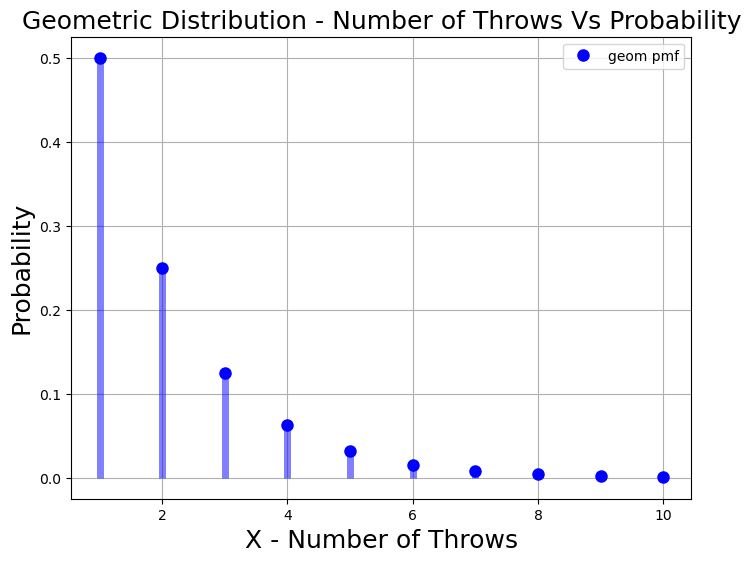

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import geom

# Parameter initialization
p = float(input("Enter p value: "))
X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Calculate geometric probability distribution
geom_pd = geom.pmf(X, p)

# Plot configuration
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(X, geom_pd, 'bo', ms=8, label='geom pmf')
ax.vlines(X, 0, geom_pd, colors='b', lw=5, alpha=0.5)
plt.xlabel('X - Number of Throws', fontsize=18)
plt.ylabel('Probability', fontsize=18)
plt.title('Geometric Distribution - Number of Throws Vs Probability', fontsize=18)
plt.legend()
plt.grid(True)
plt.show()


### <b style="text-decoration:underline">View 1 - Shifted Geometric distribution</b> <span>$X \sim Geom(p)$</span><br>
<span>X represents the <span style="color:red">number of failures</span> in a sequence of independent Bernoulli trials (with the probability of success p) needed before the first success occurs $p_i = P\{X = i\} = (1 − p)^ip \qquad$<span style="color:red">$i = 0,1, 2, \dots$</span>
\begin{align*}
G(z) &= p\sum^\infty_{i=0}(1 - p)^iz^i = \frac{p}{1 - (1 - p)z} \\
E[X] &= \frac{1 - p}{p} \\
V[X] &= \frac{(1 - p)}{p^2}
\end{align*}
***

Theoretical Mean: 3.3333333333333335
Sample Mean: 3.3232
Theoretical Variance: 7.777777777777778
Sample Variance: 7.73074176


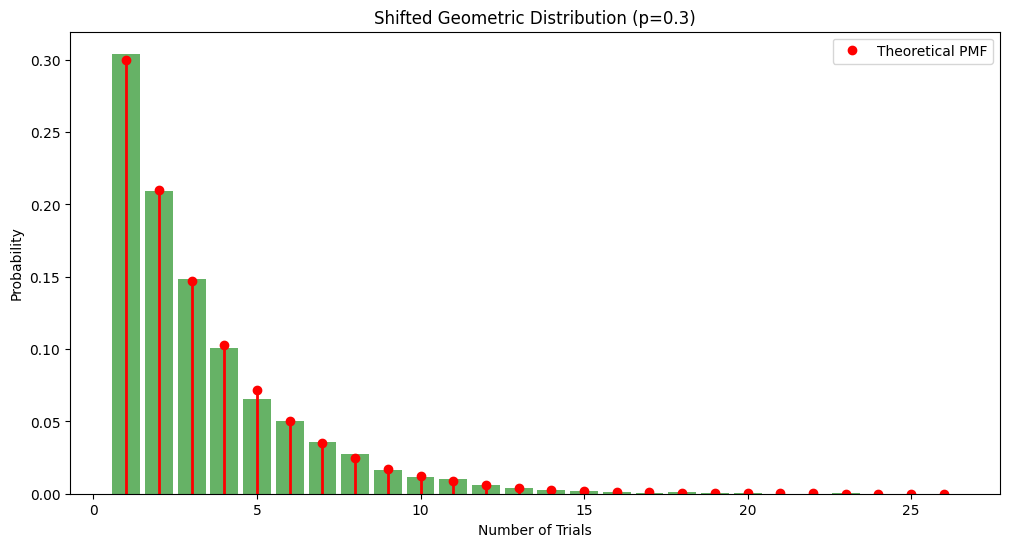

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter for the shifted geometric distribution
p = 0.3

# Generate samples from the shifted geometric distribution
size = 10000
samples = np.random.geometric(p, size)

# Calculate the sample mean and variance
sample_mean = np.mean(samples)
sample_variance = np.var(samples)

# Theoretical mean and variance
theoretical_mean = 1 / p
theoretical_variance = (1 - p) / (p ** 2)

# Print the results
print(f"Theoretical Mean: {theoretical_mean}")
print(f"Sample Mean: {sample_mean}")
print(f"Theoretical Variance: {theoretical_variance}")
print(f"Sample Variance: {sample_variance}")

# Plot the histogram of the shifted geometric distribution
plt.figure(figsize=(12, 6))
plt.hist(samples, bins=np.arange(1, max(samples)+2)-0.5, density=True, alpha=0.6, color='g', rwidth=0.85)

# Overlay the theoretical PMF
k = np.arange(1, max(samples)+1)
pmf = (1 - p) ** (k - 1) * p
plt.plot(k, pmf, 'ro', label='Theoretical PMF')
plt.vlines(k, 0, pmf, colors='r', linestyles='-', lw=2)

plt.title('Shifted Geometric Distribution (p=0.3)')
plt.xlabel('Number of Trials')
plt.ylabel('Probability')
plt.legend()
plt.show()

### <span>View 2: <b>Geometric distribution</b></span><span>$X \sim Geom(p)$</span><br>
<span>X represents the number of <span style="color:red">trials</span> in a sequence of independent Bernoulli trials (with the probability of success p) needed until the first success occurs</span>
\begin{equation*}
p_i = P\{X = i\} = (1 - p)^{i-1}p \qquad i = 1, 2, \dots
\end{equation*}
<span>Generating function</span>
\begin{equation*}
G(z) = p\sum^\infty_{i=1}(1 - p)^{i-1}z^i = \frac{pz}{1 - (1- p)z}
\end{equation*}
<span>This can be used to calculate the expectation and the variance:</span>
\begin{align*}
&E[X] = G'(1) = \frac{p(1 - (1- p)z) + p(1 - p)z}{(1 - (1 - p)z)^2}\Bigg|_{z=1} = \frac{1}{p} \\
&E[X^2] = G''(1) + G'(1) = \frac{1}{p} + \frac{2(1 - p)}{p^2} \\
&V[X] = E[X^2] - e[X]^2 = \frac{(1 - p)}{p^2}
\end{align*}
***

### <b style="text-decoration:underline">Geometric distribution (continued)</b>
<span>The probability that for the first success one needs more than <em>n</em> trials</span>
\begin{equation*}
P\{X > n\} = \sum^\infty_{i = n + 1}p_i = (1 - p)^n
\end{equation*}
<span style="text-decoration:underline">Memoryless property of geometric distribution</span>
\begin{align*}
P\{X > i + j | X > i\} \quad &= \frac{P\{X > i + j \cap X > i\}}{P\{X > j\}} \quad = \frac{P\{X > i + j\}}{P\{X > i\}} \\
&= \frac{(1 - p)^{i + j}}{(1 - p)^i} = P\{X > j\}
\end{align*}
<span>If there have been <em>i</em> unsuccessful trials then the probability that for the first success one needs still more than <em>j</em> new trials is the same as the probability that in a completely new sequence of trails one needs more than <em>j</em> trials for the first success.<br>
This is as it should be, since the past trials do not have any effect on the future trials, all of which are independent.</span>
***

P(X > s + t) = 0.0617
P(X > t) = 0.3513
P(X > s + t | X > s) = 0.3522


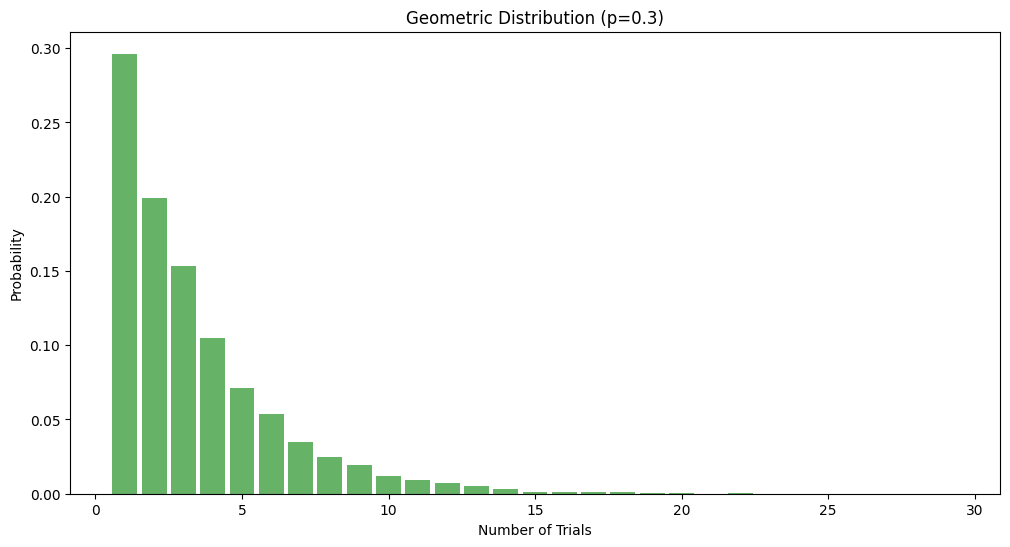

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter for the geometric distribution
p = 0.3

# Generate a large number of samples from the geometric distribution
size = 10000
samples = np.random.geometric(p, size)

# Define the values of s and t
s = 5
t = 3

# Calculate P(X > s + t) directly from the samples
prob_gt_s_plus_t = np.mean(samples > (s + t))

# Calculate P(X > t) directly from the samples
prob_gt_t = np.mean(samples > t)

# Calculate P(X > s + t | X > s) directly from the samples
samples_gt_s = samples[samples > s]
prob_gt_s_plus_t_given_gt_s = np.mean(samples_gt_s > (s + t))

# Print the results
print(f"P(X > s + t) = {prob_gt_s_plus_t:.4f}")
print(f"P(X > t) = {prob_gt_t:.4f}")
print(f"P(X > s + t | X > s) = {prob_gt_s_plus_t_given_gt_s:.4f}")

# Plot the histogram of the samples
plt.figure(figsize=(12, 6))
plt.hist(samples, bins=np.arange(1, max(samples)+2)-0.5, density=True, alpha=0.6, color='g', rwidth=0.85)
plt.title('Geometric Distribution (p=0.3)')
plt.xlabel('Number of Trials')
plt.ylabel('Probability')
plt.show()

**Negative binomial distribution** \( $X \sim \text{NB}(n, p) $\)

\( $X $\) is the number of trials needed in a sequence of Bernoulli trials needed for \($ n $\) successes.

If \( $X = i $\), then among the first \( $(i-1)$ \) trials there must have been \( $n-1 $\) successes and the trial \( $i$ \) must be a success. Thus,

$$
\text{Pr}\{X = i\} = \binom{i-1}{n-1} p^{n-1} (1-p)^{i-n} p = \binom{i-1}{n-1} p^n (1-p)^{i-n} \quad \text{if } i \geq n \\
0 \quad \text{otherwise}
$$

The number of trials for the first success \($ \sim \text{Geom}(p) $\). Similarly, the number of trials needed from that point on for the next success etc. Thus,

$$
X = X_1 + \cdots + X_n \quad \text{where } X_i \sim \text{Geom}(p) \quad (i.i.d.)
$$

Now, the generating function of the distribution is

$$
G(z) = \left( \frac{pz}{1-(1-p)z} \right)^n
$$

The point probabilities given above can also be deduced from this g.f.

The expectation and the variance are \( n \) times those of the geometric distribution

$$
\mathbb{E}[X] = \frac{n}{p} \\
\mathbb{V}[X] = n \frac{1-p}{p^2}
$$

Enter p value: .5
Enter n value: 20


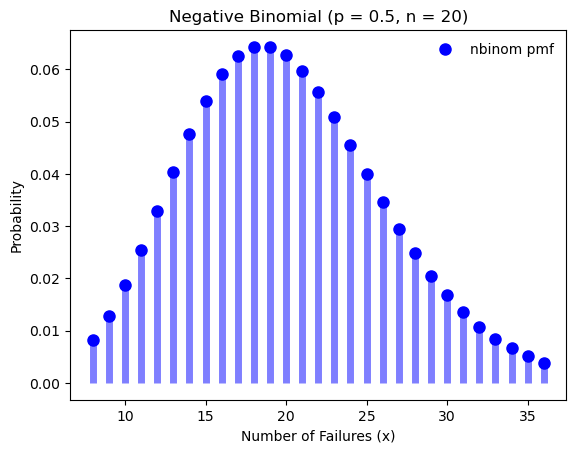

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

# Parameters initialization
p = float(input("Enter p value: "))
n = int(input("Enter n value: "))

# Configuring Negative Binomial
fig, ax = plt.subplots(1, 1)
x = np.arange(nbinom.ppf(0.01, n, p), nbinom.ppf(0.99, n, p))

# Plot configuration
plt.title(f"Negative Binomial (p = {p}, n = {n})")
ax.plot(x, nbinom.pmf(x, n, p), 'bo', ms=8, label='nbinom pmf')
ax.vlines(x, 0, nbinom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
ax.legend(loc='best', frameon=False)
plt.xlabel('Number of Failures (x)')
plt.ylabel('Probability')
plt.show()


### <span>Perf Eval of Comp Systems</span><br />
#### <span style="color: blue">7.4. Poisson($\lambda$) distribution</span>  <span>$X \sim Poisson(\lambda),$</span>
<b>Definition:</b>
<span>X is a non-negative integer-valued random variable with the point probabilities</span>
<b>Mean and variance take the following form:</b>
\begin{equation*}
p_i = P\{X = i\} = \frac{\lambda^i}{i!}e^{-\lambda} \quad i = 0, 1,
\end{equation*}
<b>Mean and variance are as follows:</b>
\begin{equation*}
E[X] = \lambda, \qquad \qquad V[X] = \lambda.
\end{equation*}
***

Enter mu value: .3
Enter size value: 10


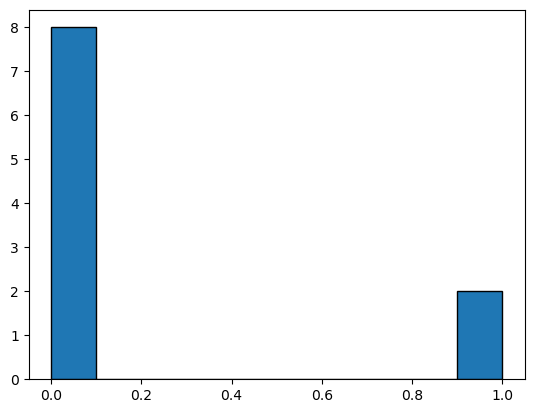

In [ ]:
# Parameter initialization
mu = float(input("Enter mu value: "))
size = int(input("Enter size value: "))

#generate Poisson distribution with given sample size
x = np.random.poisson(mu, size)

#Plot configuration
plt.hist(x, density=True, edgecolor='black')
plt.show()

### <b style="text-decoration:underline">Poisson distribution</b> <span>$X \sim Poisson(\lambda)$</span>

\begin{equation*}
p_i = P\{X = i\} = \frac{\lambda^i}{i!}e^{-\lambda} \qquad i = 0, 1, \dots
\end{equation*}

<span>The generating function</span>
\begin{equation*}
G(z) = \sum^infty_{i=0}p_iz^i = e^{-\lambda}\sum^\infty_{i=0}\frac{(z\lambda)^i}{i!} = e^{-\lambda}e^{z\lambda}
\end{equation*}

\begin{equation*}
\boxed{G(z) = e^{(z - 1)\lambda}}
\end{equation*}
<span>As we saw before, this generating function is obtained as a limiting form of the generating function of a Bin(n, p) random variable, when the average number of successes is kept fixed, $np = \lambda$, and n tends to infinity.<br>
Correspondingly, $X \sim Poisson(\lambda t)$ represents the number of occurrences of events (e.g. arrivals) in an interval of length <em>t</em> from a Poisson process with intensity $\lambda$:<br>
- the probability of an event (‘success’) in a small interval <em>dt</em> is <em>λdt</em>
- the probability of two simultaneous events is <em>O(λdt)<em>
- the number of events in disjoint intervals are independent
</span>
***

### <b style="text-decoration:underline">Poisson distribution (continued)</b>
<span>Poisson distribution is obeyed by e.g.
- The number of arriving calls in a given interval
- The number of calls in progress in a large (non-blocking) trunk group
Expectation and variance</span>
\begin{equation*}
\begin{aligned}
&E[X] = G'(1) = \frac{d}{dz}e^{(z - 1)\lambda}\Bigg|_{z = 1} = \lambda \\
&E[X^2] = G"(1) + G'(1) = \lambda^2 + \lambda
\end{aligned}
\qquad \Rightarrow V[x] = E[X^2] - E[X]^2 = \lambda^2 + \lambda - \lambda^2 = \lambda
\end{equation*}

\begin{equation*}
E[x] = \lambda \qquad \qquad V[x] = \lambda
\end{equation*}
***

### <b style="text-decoration:underline">Properties of Poisson distribution</b>

1. The sum of Poisson random variables is Poisson distributed.<br>
<span>$X = X_1 + X_2$, where $X_1 \sim Poisson(\lambda_1), X_2 \sim Poisson(\lambda_2)$ <br>
$\Rightarrow X \sim Poisson(\lambda_1, \lambda_2)$</span><br>
<span>Proof:</span>
\begin{align*}
&G_{X_1}(z) = e^{(z - 1)\lambda_1}, G_{X_2}(z) = e^{(z - 1)\lambda_2} \\
&G_X(z) = G_{X_1}(Z)G_{X_2}(Z) = e^{(z-1)\lambda_1}e^{(z-1)\lambda_2} = e^{(z-1)(\lambda_1 + \lambda_2)}
\end{align*}

2. If the number, <em>N</em> , of elements in a set obeys Poisson distribution, $N \sim Poisson(\lambda)$, and one makes a random selection with probability <em>p</em> (each element is independently selected with this probability), then the $\underline{size\ of}$ the selected set $K \sim Poisson(p \lambda)$.<br>
<span>Proof: <em>K</em> obeys the compound distribution<br>
$K = X_1 + \dots + x_N$, where $N \sim Poisson(\lambda$ and $X_i \sim Bernoulli(p$</span>

\begin{align*}
&G_X(z) = (1- p) + pz, \quad G_N(z) = e^{(z-1)\lambda} \\
&G_K(z) = G_N(G_X(z)) = e^{(G_X(z) - 1)\lambda} = e^{[(1 - p) + pz - 1]\lambda} = e^{(z - 1)p\lambda}
\end{align*}
***

### <b style="text-decoration:underline">Properties of Poisson distribution (continued)</b>

3. If the elements of a set with size $N \sim Poisson(\lambda)$ are randomly assigned to one of two groups 1 and 2 with probabilities $p_1 and\ p_2 = 1 − p_1$, then the sizes of the sets 1 and 2, $N_1 and\ N_2$, are independent and distributed as<br>
\begin{equation*}
N_1 \sim Poisson(p_1\lambda), \quad N_2 \sim Poisson(p_2\lambda)
\end{equation*}
<span>Proof: By the law of total probability,</span>
\begin{align*}
P\{N_1 = n_1, N_2 = n_2\} &= \sum^\infty_{n=0}\underbrace{P\{N_1 = n_1, N_2 = n_2 | N = n\}}_{multinomial\ distribution} \times \underbrace{P\{N = n\}}_{Poisson\ distribution} \\
&= \frac{n!}{n_1!n_2!}p_1^{n_1}p_2^{n_2}\frac{\lambda^n}{n!}e^{-\lambda}\Bigg|_{n=n_1+n_2} = \frac{P_1^{n_1}p_2^{n_2}}{n_1!n_2!}\lambda^{n_1+n_2}e^{-\lambda \overbrace{(p_1+p_2)}^{1}} \\
&= \frac{(p_1\lambda)^{n_1}}{n_1!}e^{-p_1\lambda} \times \frac{(p_2\lambda)^{n_2}}{n_2!}e^{-p_2\lambda} = P\{N_1 = n_1\} \cdot P\{N_2 = n_2\}
\end{align*}

<span>The joint probability is of product form $\Rightarrow N_1$ are $N_2$ independent. The factors in the product are point probabilities of $Poisson(p_1\lambda)$ and $Poisson(p_2\lambda)$ distributions.<br>
Note, the result can be generalized for any number of sets.</span>
***

**Perf Eval of Comp Systems**

**7.5 Generating function of the complementary distribution**

Let \( $X $\) be a random variable that assumes integer \( $k $\) with probability \( $p_k$ \) and let \($ q_k $\) be the distribution for its tails:

$$
q_k = \mathbb{P}\{X > k\} = p_{k+1} + p_{k+2} + \cdots
$$

We denote the PGF of \( $\{p_k\}$ \) by \( $P(z)$ \) and the generating function of \( $\{q_k\}$ \) by \($ Q(z) $\). Then it is not difficult to find the following simple relation:

$$
Q(z) = \frac{1 - P(z)}{1 - z}
$$

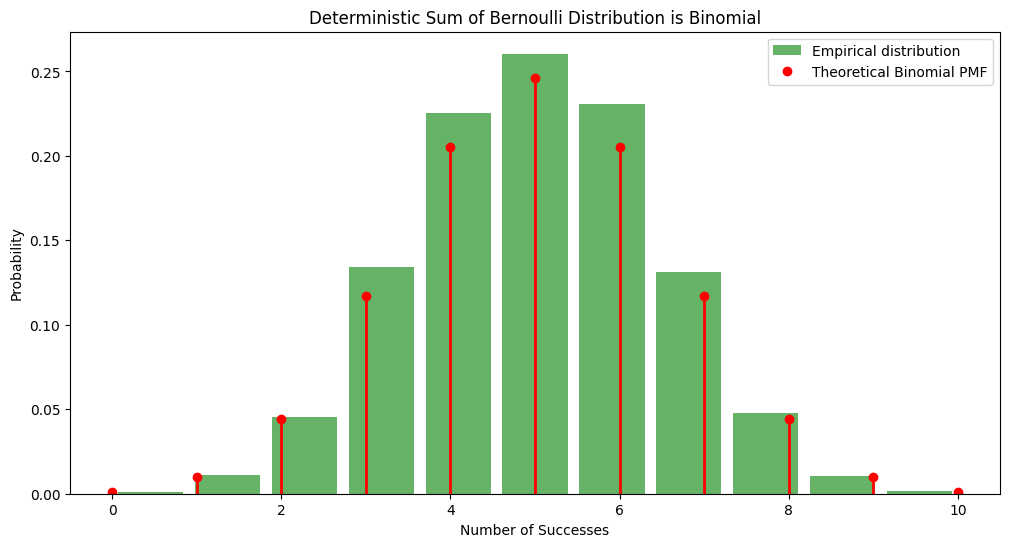

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, bernoulli

# Parameters
p = 0.5  # Probability of success for Bernoulli distribution
n = 10  # Number of Bernoulli trials

# Generate Bernoulli trials
bernoulli_trials = bernoulli.rvs(p, size=(10000, n))

# Sum the Bernoulli trials
binomial_samples = bernoulli_trials.sum(axis=1)

# Theoretical Binomial PMF
x = np.arange(0, n+1)
pmf_binomial = binom.pmf(x, n, p)

# Plot the empirical distribution and theoretical PMF
plt.figure(figsize=(12, 6))
plt.hist(binomial_samples, bins=n+1, density=True, alpha=0.6, color='g', rwidth=0.85, label='Empirical distribution')
plt.plot(x, pmf_binomial, 'ro', label='Theoretical Binomial PMF')
plt.vlines(x, 0, pmf_binomial, colors='r', linestyles='-', lw=2)
plt.title('Deterministic Sum of Bernoulli Distribution is Binomial')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.legend()
plt.show()

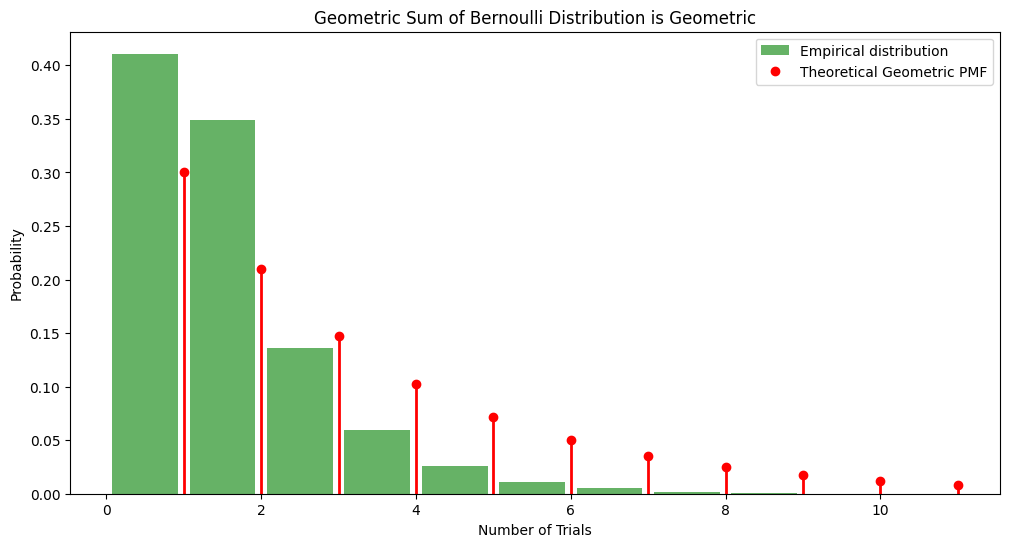

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom, bernoulli

# Parameters
p = 0.3  # Probability of success for Bernoulli distribution

# Generate Geometric number of Bernoulli trials
size = 10000
geometric_trials = geom.rvs(p, size=size)

# Sum the Bernoulli trials (each trial is a geometric number of Bernoulli trials)
geometric_sum_samples = [np.sum(bernoulli.rvs(p, size=n)) for n in geometric_trials]

# Theoretical Geometric PMF
x = np.arange(1, max(geometric_sum_samples)+1)
pmf_geometric = geom.pmf(x, p)

# Plot the empirical distribution and theoretical PMF
plt.figure(figsize=(12, 6))
plt.hist(geometric_sum_samples, bins=max(geometric_sum_samples), density=True, alpha=0.6, color='g', rwidth=0.85, label='Empirical distribution')
plt.plot(x, pmf_geometric, 'ro', label='Theoretical Geometric PMF')
plt.vlines(x, 0, pmf_geometric, colors='r', linestyles='-', lw=2)
plt.title('Geometric Sum of Bernoulli Distribution is Geometric')
plt.xlabel('Number of Trials')
plt.ylabel('Probability')
plt.legend()
plt.show()

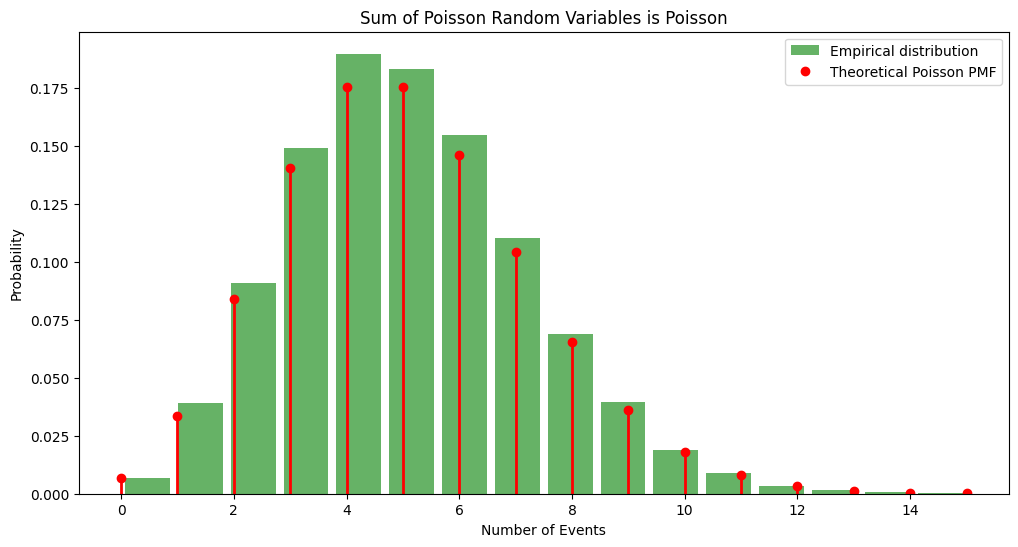

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Parameters
lambda1 = 3  # Rate parameter for the first Poisson distribution
lambda2 = 2  # Rate parameter for the second Poisson distribution

# Generate samples from Poisson distributions
size = 10000
poisson_samples1 = poisson.rvs(lambda1, size=size)
poisson_samples2 = poisson.rvs(lambda2, size=size)

# Sum the Poisson samples
poisson_sum_samples = poisson_samples1 + poisson_samples2

# Theoretical Poisson PMF
lambda_sum = lambda1 + lambda2
x = np.arange(0, max(poisson_sum_samples)+1)
pmf_poisson = poisson.pmf(x, lambda_sum)

# Plot the empirical distribution and theoretical PMF
plt.figure(figsize=(12, 6))
plt.hist(poisson_sum_samples, bins=max(poisson_sum_samples)+1, density=True, alpha=0.6, color='g', rwidth=0.85, label='Empirical distribution')
plt.plot(x, pmf_poisson, 'ro', label='Theoretical Poisson PMF')
plt.vlines(x, 0, pmf_poisson, colors='r', linestyles='-', lw=2)
plt.title('Sum of Poisson Random Variables is Poisson')
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.legend()
plt.show()

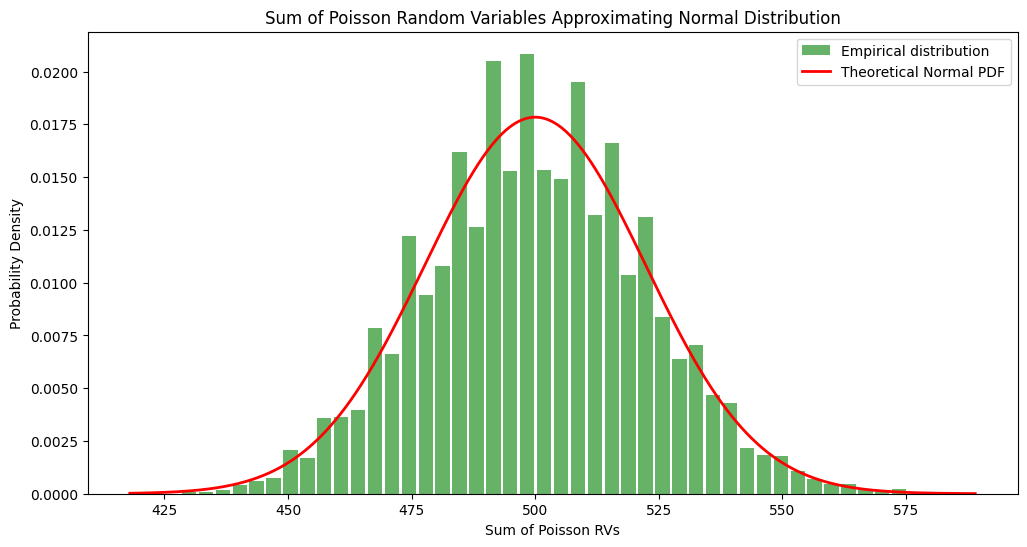

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, norm

# Parameters
lambda_poisson = 5  # Rate parameter for the Poisson distribution
num_poisson_rvs = 100  # Number of Poisson random variables to sum

# Generate samples from Poisson distributions and sum them
size = 10000
poisson_samples = np.random.poisson(lambda_poisson, (size, num_poisson_rvs))
poisson_sum_samples = poisson_samples.sum(axis=1)

# Theoretical Normal Distribution
mean_sum = num_poisson_rvs * lambda_poisson
std_sum = np.sqrt(num_poisson_rvs * lambda_poisson)
x = np.linspace(min(poisson_sum_samples), max(poisson_sum_samples), 1000)
pdf_normal = norm.pdf(x, mean_sum, std_sum)

# Plot the empirical distribution and theoretical normal distribution
plt.figure(figsize=(12, 6))
plt.hist(poisson_sum_samples, bins=50, density=True, alpha=0.6, color='g', rwidth=0.85, label='Empirical distribution')
plt.plot(x, pdf_normal, 'r-', lw=2, label='Theoretical Normal PDF')
plt.title('Sum of Poisson Random Variables Approximating Normal Distribution')
plt.xlabel('Sum of Poisson RVs')
plt.ylabel('Probability Density')
plt.legend()
plt.show()